In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime as dt

In [17]:
ca_df = pd.read_csv("Resources/Cleaned Weather Data/CAWeatherCleaned.csv")
fl_df = pd.read_csv("Resources/Cleaned Weather Data/FLWeatherCleaned.csv")
il_df = pd.read_csv("Resources/Cleaned Weather Data/ILWeatherCleaned.csv")

ca_df

,Unnamed: 0,Date,Average Temperature (C),State,Country,Average Temperature (F)
0,71371,1875-02-01,7,California,United States,45
1,71372,1875-03-01,8,California,United States,47
2,71373,1875-04-01,13,California,United States,57
3,71374,1875-05-01,18,California,United States,64
4,71375,1875-06-01,21,California,United States,70
...,...,...,...,...,...,...
1659,73030,2013-05-01,17,California,United States,64
1660,73031,2013-06-01,22,California,United States,72
1661,73032,2013-07-01,25,California,United States,78
1662,73033,2013-08-01,23,California,United States,74


In [18]:
ca_weather = ca_df[["Date", "Average Temperature (F)"]]
fl_weather = fl_df[["Date", "Average Temperature (F)"]]
il_weather = il_df[["Date", "Average Temperature (F)"]]
ca_weather.dtypes

Date                       object
Average Temperature (F)     int64
dtype: object

In [19]:
# Converting to Datetime
ca_weather_cleaned = ca_weather.copy()
ca_weather_cleaned["Date"] = pd.to_datetime(ca_weather_cleaned["Date"],format="%Y-%m-%d")
ca_weather_cleaned = ca_weather_cleaned.set_index(ca_weather_cleaned["Date"])
fl_weather_cleaned = fl_weather.copy()
fl_weather_cleaned["Date"] = pd.to_datetime(fl_weather_cleaned["Date"], format="%Y-%m-%d")
fl_weather_cleaned = fl_weather_cleaned.set_index(fl_weather_cleaned["Date"])
il_weather_cleaned = il_weather.copy()
il_weather_cleaned["Date"] = pd.to_datetime(il_weather_cleaned["Date"], format="%Y-%m-%d")
il_weather_cleaned = il_weather_cleaned.set_index(il_weather_cleaned["Date"])

ca_weather_cleaned

,Date,Average Temperature (F)
Date,,
1875-02-01,1875-02-01,45
1875-03-01,1875-03-01,47
1875-04-01,1875-04-01,57
1875-05-01,1875-05-01,64
1875-06-01,1875-06-01,70
...,...,...
2013-05-01,2013-05-01,64
2013-06-01,2013-06-01,72
2013-07-01,2013-07-01,78


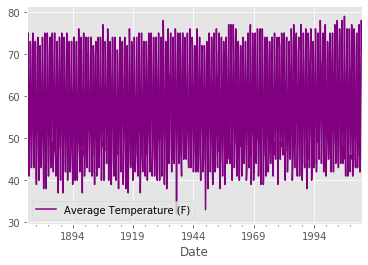

In [20]:
register_matplotlib_converters()
plt.style.use("ggplot")

ca_weather_cleaned.plot(x="Date", y= "Average Temperature (F)", color="purple")

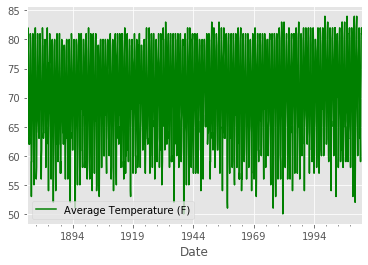

In [21]:
register_matplotlib_converters()
plt.style.use("ggplot")

fl_weather_cleaned.plot(x="Date", y= "Average Temperature (F)", color="green")

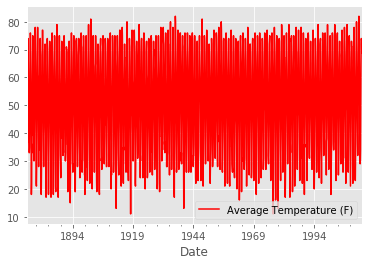

In [22]:
register_matplotlib_converters()
plt.style.use("ggplot")

il_weather_cleaned.plot(x="Date", y= "Average Temperature (F)", color="red")

In [23]:
# ca_weather_cleaned = ca_weather_cleaned.loc['1990-01-01':'2013-09-01']
# ca_weather_cleaned.plot(x="Date", y="Average Temperature (F)", color="purple")

In [24]:
# il_weather_cleaned = il_weather_cleaned.loc['1990-01-01':'2013-09-01']
# il_weather_cleaned.plot(x="Date", y="Average Temperature (F)", color="red")

In [25]:
# fl_weather_cleaned = fl_weather_cleaned.loc['1990-01-01':'2013-09-01']
# fl_weather_cleaned.plot(x="Date", y="Average Temperature (F)", color="green")

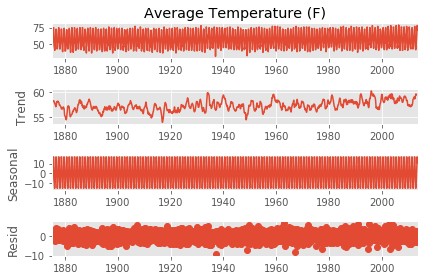

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ca_weather_cleaned["Average Temperature (F)"])
fig = result.plot()

In [44]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
train_df = ca_weather_cleaned.rename(columns={"Average Temperature (F)": "y"})
train_df["ds"] = train_df.index
model.fit(train_df)

Average Temperature vs. Date Forecast for California 1875-2113


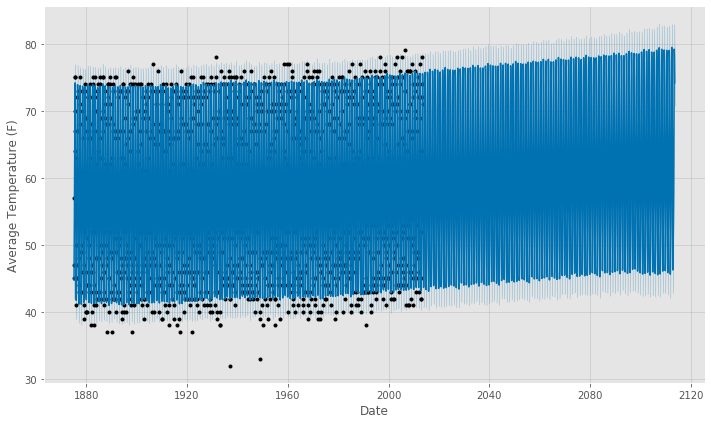

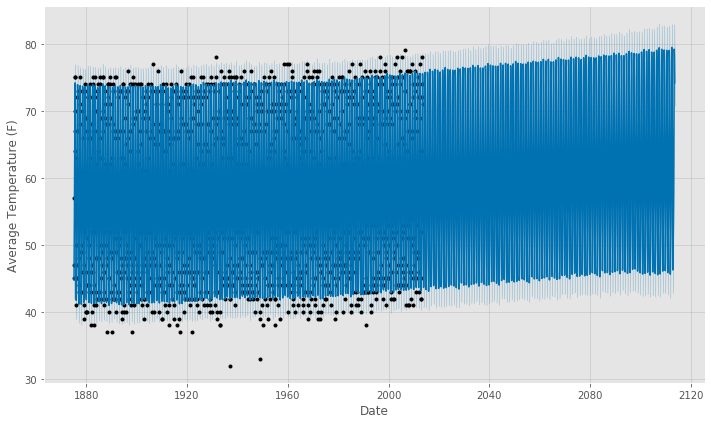

In [45]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 1200 months
future = model.make_future_dataframe(1200, freq= 'M', include_history=True)
forecast = model.predict(future)

print("Average Temperature vs. Date Forecast for California 1875-2113")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="Average Temperature (F)")

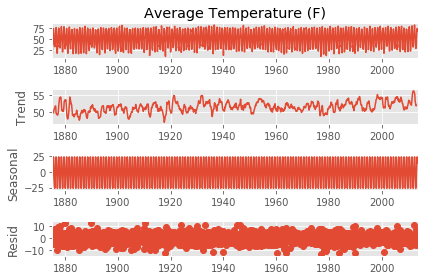

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(il_weather_cleaned["Average Temperature (F)"])
fig = result.plot()

In [53]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
train_df = il_weather_cleaned.rename(columns={"Average Temperature (F)": "y"})
train_df["ds"] = train_df.index
model.fit(train_df)

Average Temperature vs. Date Forecast for Illinois 1875-2113


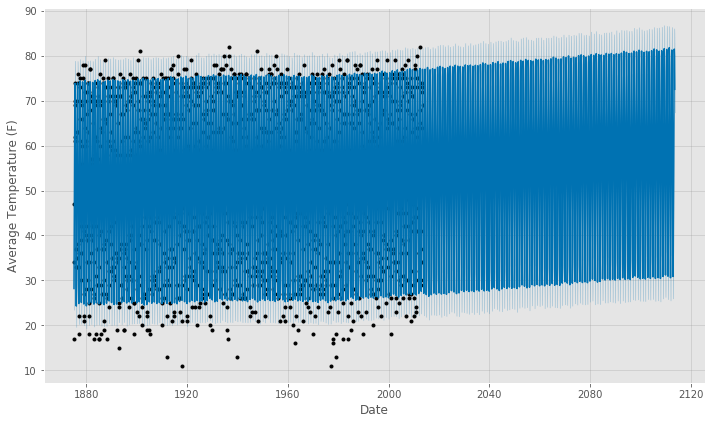

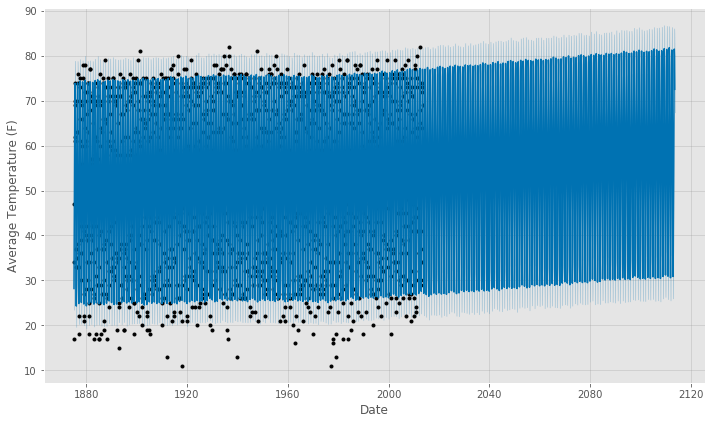

In [54]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 1200 months
future = model.make_future_dataframe(1200, freq= 'M', include_history=True)
forecast = model.predict(future)

print("Average Temperature vs. Date Forecast for Illinois 1875-2113")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="Average Temperature (F)")

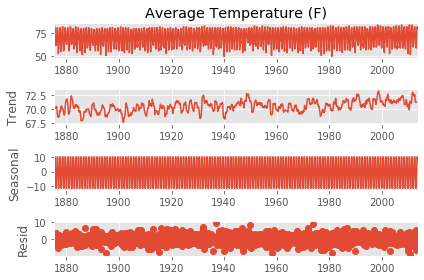

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(fl_weather_cleaned["Average Temperature (F)"])
fig = result.plot()

In [56]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
train_df = fl_weather_cleaned.rename(columns={"Average Temperature (F)": "y"})
train_df["ds"] = train_df.index
model.fit(train_df)

Average Temperature vs. Date Forecast for Florida 1875-2113


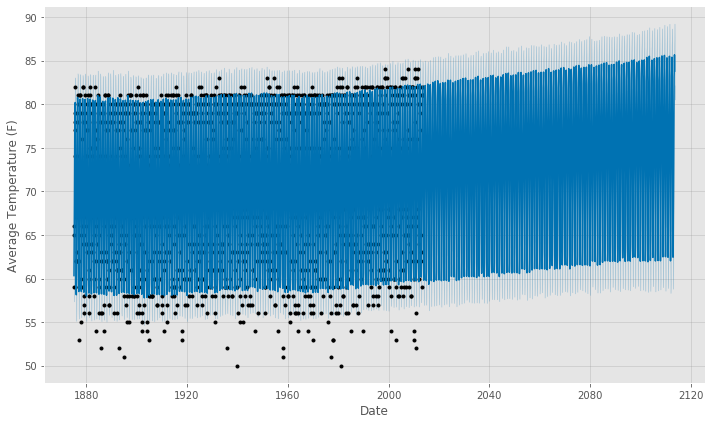

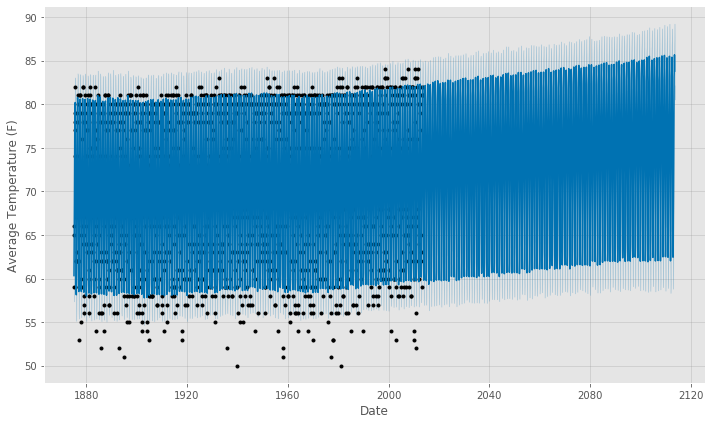

In [57]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 1200 months
future = model.make_future_dataframe(1200, freq= 'M', include_history=True)
forecast = model.predict(future)

print("Average Temperature vs. Date Forecast for Florida 1875-2113")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="Average Temperature (F)")